### Import Library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, plot_confusion_matrix, classification_report, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/Wayan123/dataset-ml/main/car_evaluation.csv')
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
data.columns = col_names
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
data.isnull().sum() 

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Exploratory Data  Analysis using Tableu

Link : https://public.tableau.com/app/profile/siddharth.kulkarni2558/viz/EDAonCarEvaluation/Dashboard1

In [9]:
%%HTML
<div class='tableauPlaceholder' id='viz1637670871760' style='position: relative'><noscript><a href='#'><img alt='Car Evaluation Exploratory Data Analysis ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAonCarEvaluation&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='EDAonCarEvaluation&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAonCarEvaluation&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1637670871760');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1677px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Feature Engineering

In [7]:
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [10]:
encoder = ce.OrdinalEncoder(cols = ['buying','maint','doors','persons','lug_boot','safety','class'])
data = encoder.fit_transform(data)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,2,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


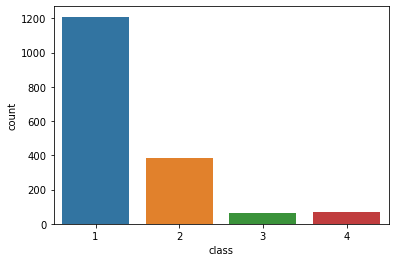

In [31]:
#Univariate analysis class.
sns.countplot(data['class'])

### Declare

In [11]:
x = data.drop(['class'], axis=1)

y = data['class']

### Split data into Train test

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1157, 6), (570, 6), (1157,), (570,))

In [13]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,4,1,2,3
48,1,1,2,3,2,1
468,2,1,2,2,1,1
155,1,2,2,3,2,3
1043,3,2,3,3,1,3


In [14]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,3
932,3,1,3,2,3,3
628,2,2,4,1,3,2
1497,4,2,4,2,2,1
1262,3,4,3,3,2,3


In [15]:
y_train.head()

83      1
48      1
468     1
155     1
1043    1
Name: class, dtype: int32

In [16]:
y_test.head()

599     1
932     1
628     1
1497    2
1262    1
Name: class, dtype: int32

### Data Modeling

In [17]:
def evaluation_parametrics(y_train,yp_train,y_test,yp_test):
  print("--------------------------------------------------------------------------")
  print("Classification Report for Train Data")
  print(classification_report(y_train, yp_train))
  print("Classification Report for Test Data")
  print(classification_report(y_test, yp_test))
  print("--------------------------------------------------------------------------")
  # Accuracy
  print("Accuracy on Train Data is: {}".format(round(accuracy_score(y_train,yp_train),2)))
  print("Accuracy on Test Data is: {}".format(round(accuracy_score(y_test,yp_test),2)))
  print("--------------------------------------------------------------------------")
  # Precision
  print("Precision on Train Data is: {}".format(round(precision_score(y_train,yp_train,average = "weighted"),2)))
  print("Precision on Test Data is: {}".format(round(precision_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # Recall 
  print("Recall on Train Data is: {}".format(round(recall_score(y_train,yp_train,average = "weighted"),2)))
  print("Recall on Test Data is: {}".format(round(recall_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # F1 Score
  print("F1 Score on Train Data is: {}".format(round(f1_score(y_train,yp_train,average = "weighted"),2)))
  print("F1 Score on Test Data is: {}".format(round(f1_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")

### 1. Decision tree

In [23]:
dt = DecisionTreeClassifier(max_depth = 7,random_state = 48) # Keeping max_depth = 7 to avoid overfitting
dt.fit(x_train,y_train)

yp_train = dt.predict(x_train)
yp_test = dt.predict(x_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       0.97      0.98      0.98       968
           2       0.86      0.89      0.87       303
           3       0.83      0.79      0.81        56
           4       0.83      0.63      0.72        54

    accuracy                           0.94      1381
   macro avg       0.87      0.82      0.84      1381
weighted avg       0.94      0.94      0.94      1381

Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.97      0.98      0.98       241
           2       0.86      0.90      0.88        81
           3       0.73      0.89      0.80         9
           4       0.86      0.40      0.55        15

    accuracy                           0.93       346
   macro avg       0.85      0.79      0.80       346
weighted avg       0.93      0.93    

### 2. Logistic Regression

In [22]:
lr = LogisticRegression(max_iter = 1000,random_state = 48)
lr.fit(x_train,y_train)

yp_train = lr.predict(x_train)
yp_test = lr.predict(x_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       0.83      0.92      0.87       968
           2       0.59      0.49      0.53       303
           3       0.38      0.16      0.23        56
           4       0.47      0.35      0.40        54

    accuracy                           0.77      1381
   macro avg       0.57      0.48      0.51      1381
weighted avg       0.75      0.77      0.75      1381

Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.80      0.94      0.87       241
           2       0.67      0.40      0.50        81
           3       0.60      0.33      0.43         9
           4       0.55      0.40      0.46        15

    accuracy                           0.77       346
   macro avg       0.65      0.52      0.56       346
weighted avg       0.76      0.77    

### 3. Random Forest

In [24]:
rf = RandomForestClassifier(max_depth = 7,random_state = 48) # Keeping max_depth = 7 same as DT
rf.fit(x_train,y_train)

yp_train = rf.predict(x_train)
yp_test = rf.predict(x_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)



--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       968
           2       0.88      0.98      0.93       303
           3       0.86      0.79      0.82        56
           4       0.95      0.70      0.81        54

    accuracy                           0.96      1381
   macro avg       0.92      0.86      0.89      1381
weighted avg       0.97      0.96      0.96      1381

Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       241
           2       0.92      0.95      0.93        81
           3       0.73      0.89      0.80         9
           4       1.00      0.60      0.75        15

    accuracy                           0.96       346
   macro avg       0.91      0.86      0.87       346
weighted avg       0.96      0.96    